<h1><b></b> GoodCabs Analysis</b></h1>

<h4><b>~"Goodcabs: Bridging cities, enriching lives."</b></h4>

<p>"Goodcabs: “Goodcabs isn’t just a transportation service; it’s a journey toward empowering local communities and redefining convenience for passengers. Over the past two years, Goodcabs has focused on tier-2 cities, tapping into markets often overlooked by others. This strategy has not only allowed us to provide reliable mobility options to our customers but has also supported local drivers, giving them an opportunity to thrive in their hometowns. Today, with a growing presence in 10 cities across India, Goodcabs stands at a pivotal point—one where data-driven insights can accelerate growth, enhance passenger satisfaction, and build a truly sustainable business model.”</p>

<b> Importing libraries</b>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

<b> Created DataFrames </b>

In [47]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/dim_city.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/dim_date.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/dim_repeat_trip_distribution.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/city_target_passenger_rating.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/fact_passenger_summary.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/fact_trips.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/monthly_target_new_passengers.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Colab/csv_files/monthly_target_trips.csv')

<p> <b> Checking missing values <b> </p>

In [48]:
print('The null values sum is:',
      df1.isnull().sum().sum(),
      df2.isnull().sum().sum(),
      df3.isnull().sum().sum(),
      df4.isnull().sum().sum(),
      df5.isnull().sum().sum(),
      df6.isnull().sum().sum(),
      df7.isnull().sum().sum(),
      df8.isnull().sum().sum())

The null values sum is: 0 0 0 0 0 0 0 0


<h4> Checking the Data types </h4>

In [49]:
print("Data types for df1:")
print(df1.dtypes)
print("\n")

print("Data types for df2:")
print(df2.dtypes)
print("\n")

print("Data types for df3:")
print(df3.dtypes)
print("\n")

print("Data types for df4:")
print(df4.dtypes)
print("\n")

print("Data types for df5:")
print(df5.dtypes)
print("\n")

print("Data types for df6:")
print(df6.dtypes)
print("\n")

print("Data types for df7:")
print(df7.dtypes)
print("\n")

print("Data types for df8:")
print(df8.dtypes)
print("\n")

Data types for df1:
city_id      object
city_name    object
dtype: object


Data types for df2:
date              object
start_of_month    object
month_name        object
day_type          object
dtype: object


Data types for df3:
month                     object
city_id                   object
trip_count                object
repeat_passenger_count     int64
dtype: object


Data types for df4:
city_id                         object
target_avg_passenger_rating    float64
dtype: object


Data types for df5:
month                object
city_id              object
new_passengers        int64
repeat_passengers     int64
total_passengers      int64
dtype: object


Data types for df6:
trip_id                   object
date                      object
city_id                   object
passenger_type            object
distance_travelled(km)     int64
fare_amount                int64
passenger_rating           int64
driver_rating              int64
dtype: object


Data types for df7:
month     

<h3> PRIMARY QUESTIONS</h3>

<h4> <b> 1. Top and Bottom Performing Cities <b> </h4>

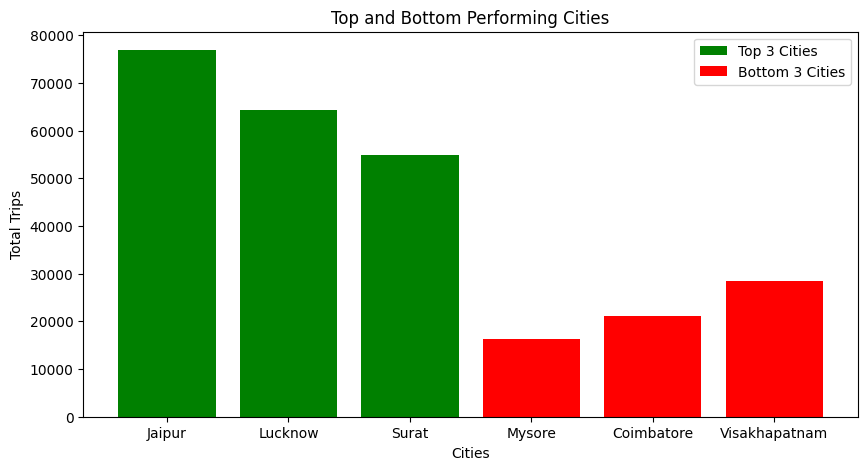

In [50]:
# Merge fact_trips with dim_city
df_trips = pd.merge(df6, df1, on='city_id')
city_trips = df_trips.groupby('city_name')['trip_id'].count().reset_index()

# Sort to find top and bottom performing cities
top_cities = city_trips.nlargest(3, 'trip_id')
bottom_cities = city_trips.nsmallest(3, 'trip_id')

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_cities['city_name'], top_cities['trip_id'], color='green', label='Top 3 Cities')
plt.bar(bottom_cities['city_name'], bottom_cities['trip_id'], color='red', label='Bottom 3 Cities')
plt.xlabel('Cities')
plt.ylabel('Total Trips')
plt.title('Top and Bottom Performing Cities')
plt.legend()
plt.show()

<h4><b> 2. Average Fare per Trip by City </b></h4>

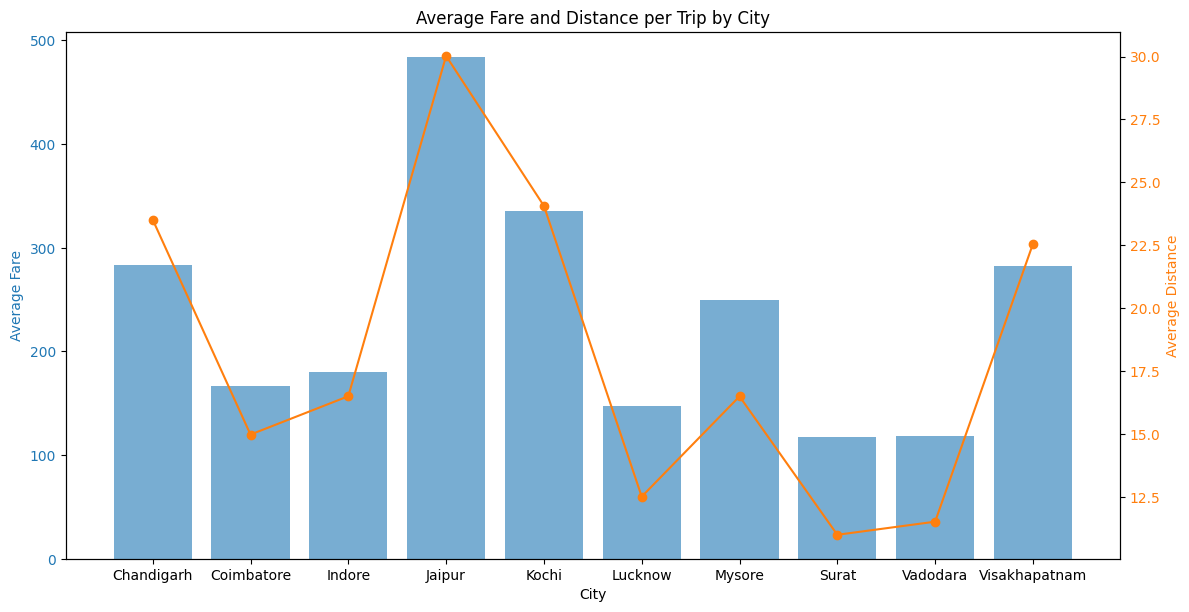

In [51]:
# Aggregate average fare and distance by city
df_fare_distance = df_trips.groupby('city_name').agg({'fare_amount': 'mean', 'distance_travelled(km)': 'mean'}).reset_index()

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('City')
ax1.set_ylabel('Average Fare', color='tab:blue')
ax1.bar(df_fare_distance['city_name'], df_fare_distance['fare_amount'], color='tab:blue', alpha=0.6, label='Average Fare')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Distance', color='tab:orange')
ax2.plot(df_fare_distance['city_name'], df_fare_distance['distance_travelled(km)'], color='tab:orange', marker='o', label='Average Distance')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Average Fare and Distance per Trip by City')
plt.show()

<h4><b>  3. Average Ratings by City and Passenger Type </b></h4>

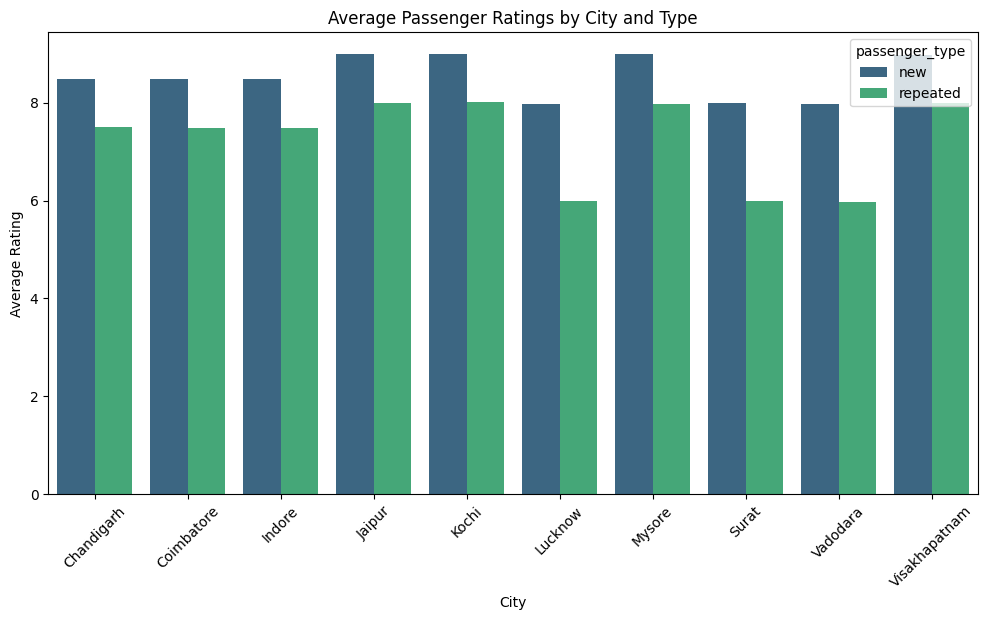

In [52]:
df_ratings = pd.merge(df6, df5, on='city_id')
df_ratings = pd.merge(df_ratings, df1, on='city_id')

# Calculate average ratings by city and passenger type
ratings = df_ratings.groupby(['city_name', 'passenger_type']).agg({
    'passenger_rating': 'mean',
    'driver_rating': 'mean'
}).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='city_name', y='passenger_rating', hue='passenger_type', data=ratings, palette='viridis')
plt.title('Average Passenger Ratings by City and Type')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

<h4><b> 4. Peak and Low Demand Months by City </b></h4>

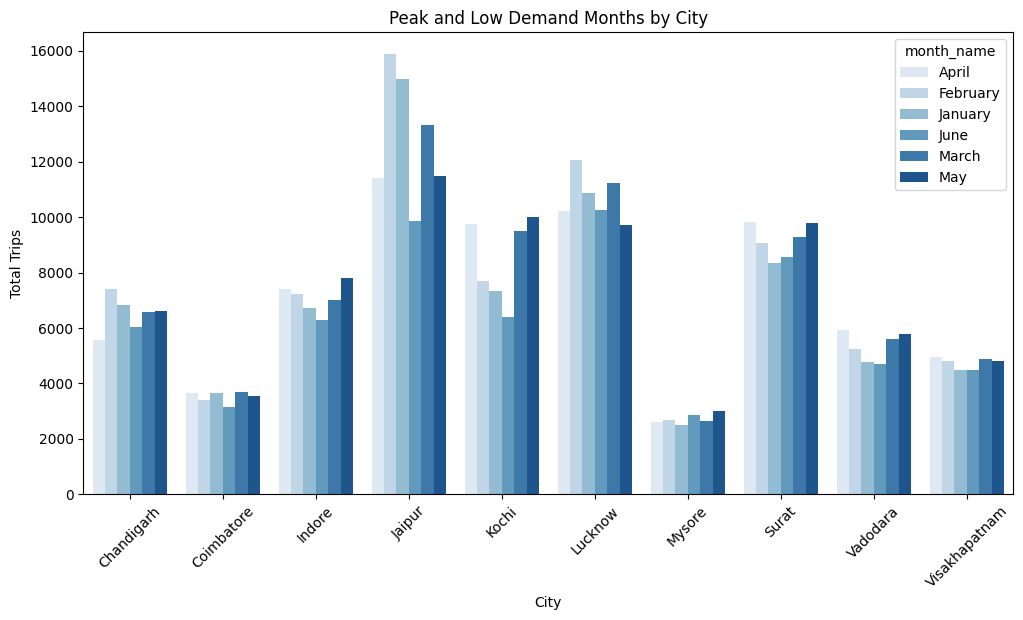

In [53]:
df_monthly_trips = pd.merge(df6, df2, on='date')
df_monthly_trips = pd.merge(df_monthly_trips, df1, on='city_id')

# Aggregate total trips by month and city
monthly_trips = df_monthly_trips.groupby(['city_name', 'month_name'])['trip_id'].count().reset_index()

# Find peak and low demand months
peak_months = monthly_trips.loc[monthly_trips.groupby('city_name')['trip_id'].idxmax()]
low_months = monthly_trips.loc[monthly_trips.groupby('city_name')['trip_id'].idxmin()]

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='city_name', y='trip_id', hue='month_name', data=monthly_trips, palette='Blues')
plt.title('Peak and Low Demand Months by City')
plt.xlabel('City')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.show()

<h4><b> 5. Weekend vs. Weekday Trip Demand by City </b></h4>

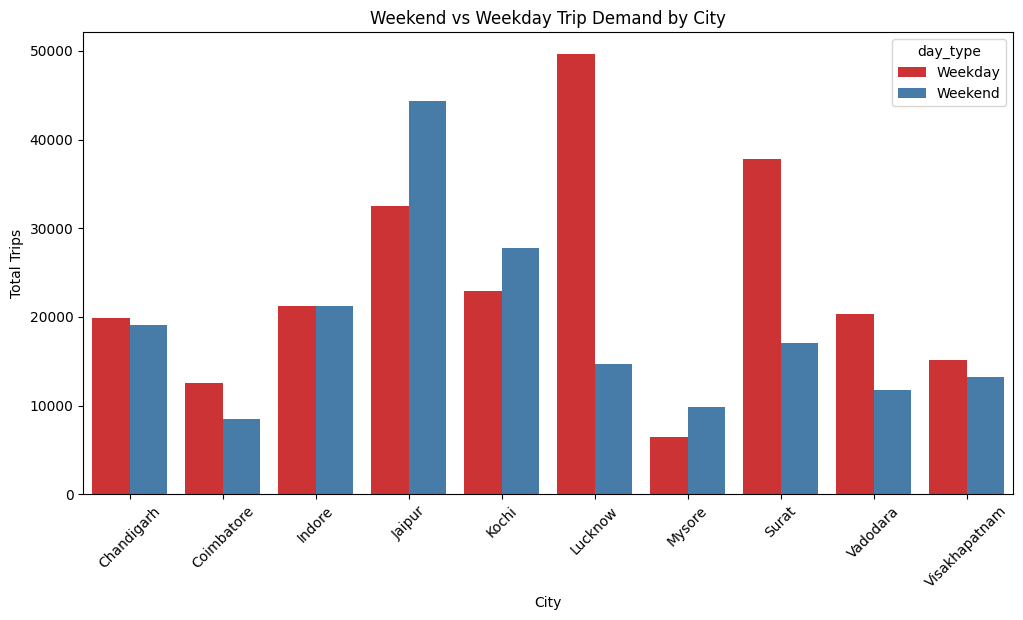

In [54]:
df_weekend_weekday = pd.merge(df6, df2, on='date')
df_weekend_weekday = pd.merge(df_weekend_weekday, df1, on='city_id')

# Filter by day type and aggregate total trips by city and day type
weekend_weekday_trips = df_weekend_weekday.groupby(['city_name', 'day_type'])['trip_id'].count().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='city_name', y='trip_id', hue='day_type', data=weekend_weekday_trips, palette='Set1')
plt.title('Weekend vs Weekday Trip Demand by City')
plt.xlabel('City')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.show()

<h4><b> 6. Repeat Passenger Frequency and City Contribution Analysis </b></h4>

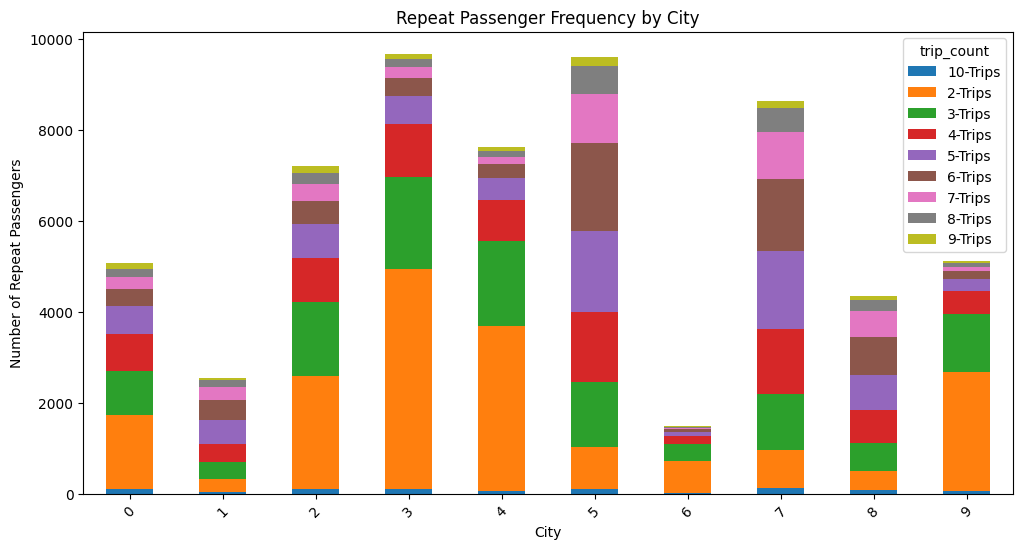

In [55]:
repeat_trip_distribution = df3.groupby(['city_id', 'trip_count'])['repeat_passenger_count'].sum().reset_index()
repeat_trip_distribution = pd.merge(repeat_trip_distribution, df1, on='city_id')
repeat_trip_pivot = repeat_trip_distribution.pivot_table(index='city_name', columns='trip_count', values='repeat_passenger_count', aggfunc='sum').reset_index()

# Visualization
repeat_trip_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Repeat Passenger Frequency by City')
plt.xlabel('City')
plt.ylabel('Number of Repeat Passengers')
plt.xticks(rotation=45)
plt.show()

<h4><b> 7. Monthly Target Achievement Analysis for Key Metrics </b></h4>

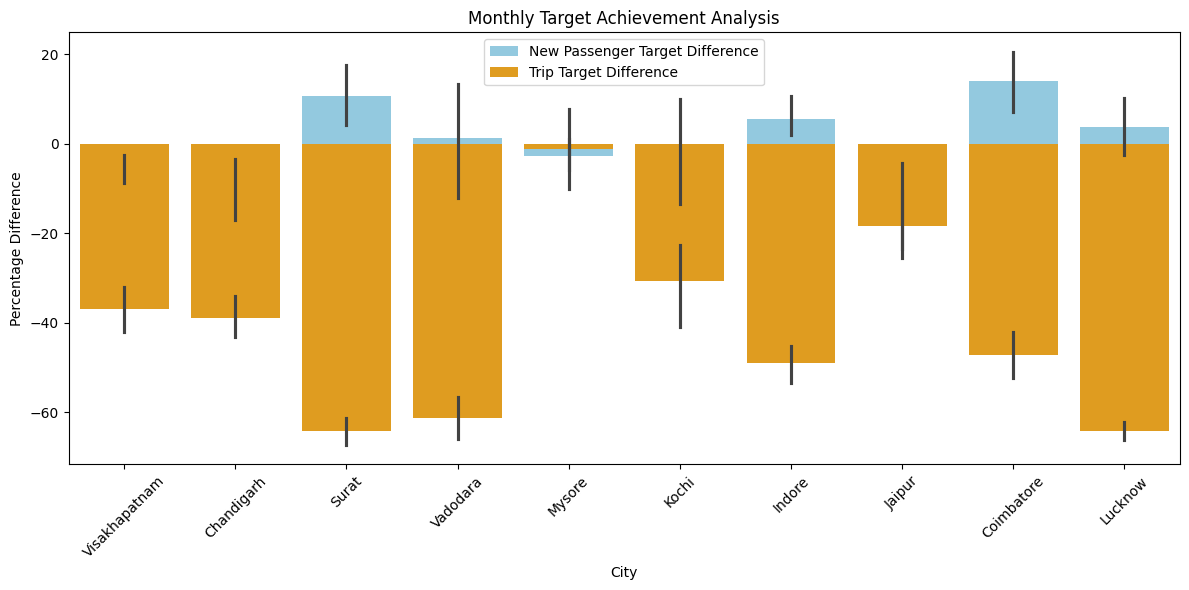

In [56]:
df_target_new_passengers = pd.merge(df5, df7, on=['city_id', 'month'], how='left')
df_target_trips = pd.merge(df5, df8, on=['city_id', 'month'], how='left')

# Calculate percentage difference for new passengers
df_target_new_passengers['new_passenger_diff'] = (
    (df_target_new_passengers['new_passengers'] - df_target_new_passengers['target_new_passengers'])
    / df_target_new_passengers['target_new_passengers']
) * 100

# Calculate percentage difference for trips
df_target_trips['trip_diff'] = (
    (df_target_trips['total_passengers'] - df_target_trips['total_target_trips'])
    / df_target_trips['total_target_trips']
) * 100

df_target_new_passengers = pd.merge(df_target_new_passengers, df1, on='city_id', how='left')
df_target_trips = pd.merge(df_target_trips, df1, on='city_id', how='left')


plt.figure(figsize=(12, 6))

# Barplot for New Passenger Target Difference
sns.barplot(
    x='city_name',
    y='new_passenger_diff',
    data=df_target_new_passengers,
    color='skyblue',
    label='New Passenger Target Difference'
)

# Barplot for Trip Target Difference
sns.barplot(
    x='city_name',
    y='trip_diff',
    data=df_target_trips,
    color='orange',
    label='Trip Target Difference'
)

# Visualization
plt.title('Monthly Target Achievement Analysis')
plt.xlabel('City')
plt.ylabel('Percentage Difference')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h4><b> 8 (i) Top and Bottom 2 Cities Based on RPR% <b></h4>

Top 2 Cities with Highest RPR%:
  city_name       RPR%
7     Surat  42.963123
5   Lucknow  38.131873

Bottom 2 Cities with Lowest RPR%:
  city_name       RPR%
6    Mysore  11.208195
3    Jaipur  18.329207


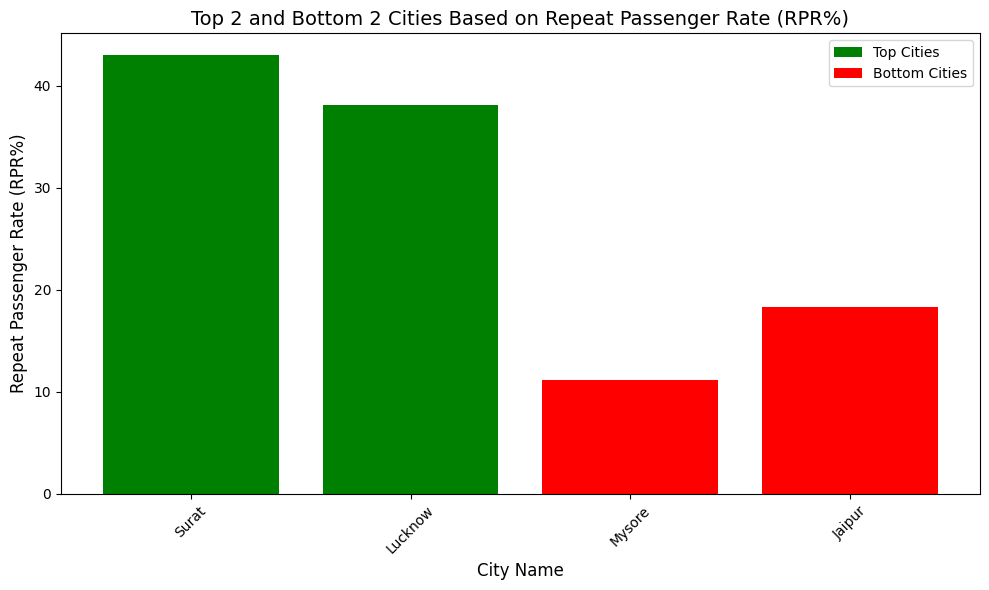

In [57]:
df_combined = pd.merge(df5, df1[['city_id', 'city_name']], on='city_id', how='left')

# Calculate Repeat Passenger Rate (RPR%) for each city
df_combined['RPR%'] = (df_combined['repeat_passengers'] / df_combined['total_passengers']) * 100

# Group by city_name to calculate the RPR% for each city
city_rpr = df_combined.groupby('city_name')['RPR%'].mean().reset_index()

top_cities = city_rpr.nlargest(2, 'RPR%')
bottom_cities = city_rpr.nsmallest(2, 'RPR%')

# Print the top and bottom cities
print("Top 2 Cities with Highest RPR%:")
print(top_cities)
print("\nBottom 2 Cities with Lowest RPR%:")
print(bottom_cities)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the top 2 cities
ax.bar(top_cities['city_name'], top_cities['RPR%'], color='green', label='Top Cities')

# Plot the bottom 2 cities
ax.bar(bottom_cities['city_name'], bottom_cities['RPR%'], color='red', label='Bottom Cities')

ax.set_title('Top 2 and Bottom 2 Cities Based on Repeat Passenger Rate (RPR%)', fontsize=14)
ax.set_xlabel('City Name', fontsize=12)
ax.set_ylabel('Repeat Passenger Rate (RPR%)', fontsize=12)
ax.legend()
plt.xticks(rotation=45)

# Visualization
plt.tight_layout()
plt.show()

<h4><b> 8 (ii) Repeat Passenger Rate (RPR%) by Month </b></h4>

Month with Highest RPR%:
month_name            May
RPR%          4302.522928
Name: 5, dtype: object

Month with Lowest RPR%:
month_name        January
RPR%          2832.589065
Name: 2, dtype: object


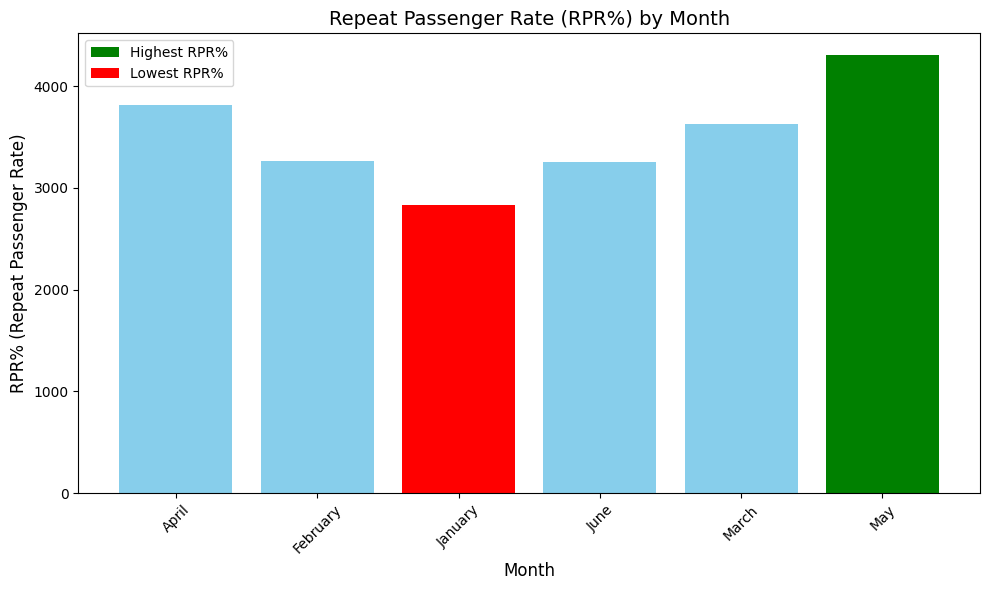

In [59]:
df3['month'] = pd.to_datetime(df3['month'])
df3['month_name'] = df3['month'].dt.month_name()

df3['trip_count'] = df3['trip_count'].str.extract('(\d+)').astype(int)

# Calculate RPR% for each month across all cities
df3['RPR%'] = (df3['repeat_passenger_count'] / df3['trip_count']) * 100

# Group by month_name and calculate the average RPR% across all cities
month_rpr = df3.groupby('month_name')['RPR%'].mean().reset_index()

# Identify the months with the highest and lowest RPR%
highest_rpr = month_rpr.loc[month_rpr['RPR%'].idxmax()]
lowest_rpr = month_rpr.loc[month_rpr['RPR%'].idxmin()]

print("Month with Highest RPR%:")
print(highest_rpr)
print("\nMonth with Lowest RPR%:")
print(lowest_rpr)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(month_rpr['month_name'], month_rpr['RPR%'], color='skyblue')

# Highlight the highest and lowest months
plt.bar(highest_rpr['month_name'], highest_rpr['RPR%'], color='green', label='Highest RPR%')
plt.bar(lowest_rpr['month_name'], lowest_rpr['RPR%'], color='red', label='Lowest RPR%')

plt.title('Repeat Passenger Rate (RPR%) by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('RPR% (Repeat Passenger Rate)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h2> Secondary Questions </h2>

<h4><b> 1. Factors Influencing Repeat Passenger Rates </b></h4>

Repeat Passenger Rate (RPR%) is a critical metric for evaluating customer loyalty and business  sustainability in the cab service industry. Several factors can significantly influence RPR%, especially in the context of tier-2 cities where passenger needs and preferences differ from larger metropolitan areas.

1. **Service Quality:** Passenger satisfaction is directly tied to factors such as punctuality, driver professionalism, cleanliness, and overall ride comfort. Negative experiences can deter passengers from returning, while consistent positive interactions can enhance loyalty.

2. **Affordability and Pricing Strategies:** Tier-2 cities are often more price-sensitive. Offering competitive pricing, dynamic discounts for frequent users, and loyalty rewards can incentivize passengers to choose Goodcabs repeatedly.

3. **Local Connectivity and Coverage:** Providing reliable services in underserved areas and catering to commuter hotspots such as residential neighborhoods, markets, and transit hubs ensures that Goodcabs becomes a go-to option for passengers.

4. **Driver Familiarity with the Local Area:** Passengers are more likely to rebook rides if drivers demonstrate knowledge of the local geography, suggesting efficient routes and avoiding unnecessary delays.

5. **Personalized Offers:** Tailoring services to individual passengers, such as offering discounts for specific routes or occasions (e.g., work commutes or festive trips), can foster loyalty and improve RPR%.

6. **Demand Type:** RPR% can vary based on the nature of demand. Business-related trips typically exhibit higher repeat rates due to routine travel needs, whereas tourism demand might result in lower repeat bookings as these trips are often one-off.

By understanding and leveraging these factors, Goodcabs can strategically enhance RPR%, ensuring customer satisfaction and fostering long-term loyalty in tier-2 cities.


<h4><b>  2. Tourism vs. Business Demand Impact </b></h4>

**Tourism Impact**
1. **Regional Attractions and Cultural Events:**
Tourism demand in tier-2 cities often revolves around local attractions, historical sites, religious landmarks, or regional festivals. Demand peaks are likely linked to specific events rather than continuous inflow.
2. **Short-Distance Trips:**
Tourists in tier-2 cities might prefer short intra-city or nearby inter-city trips. Cabs may be used to connect rail or bus terminals to destinations, highlighting the importance of localized trip patterns.
3. **Local Knowledge and Personalization:**
Tourists may seek guidance for less-known destinations or regional experiences. Cabs could provide added value by offering local insights or partnering with local guides.
4. **Limited Seasonality but Focused Demand:**
While demand might not rival tier-1 cities, spikes during holiday seasons still present a significant opportunity. Offering tailored tour packages for specific occasions or attractions can optimize cab usage.

**Business Impact**
1. **Emerging Business Hubs:**
Tier-2 cities often have smaller but growing business districts, such as industrial zones or IT parks. Demand is concentrated in these areas, often involving regular travel between offices, hotels, and transport hubs.
2. **Localized and Budget-Conscious Services:**
Businesses in tier-2 cities might prioritize cost-effective solutions. Providing subscription-based or shared ride options could make services more appealing.
3. **Frequent Inter-City Travel:**
Business passengers in tier-2 cities might travel frequently to tier-1 cities or nearby commercial hubs. Services focusing on inter-city connectivity could address this need effectively.
4. **Building Trust with Local Businesses:**
Establishing strong ties with local companies, offering employee transport packages, and maintaining reliability can help build a stable customer base.



<h4><b> 3. Emerging Mobility Trends and Goodcabs’ Adaptation </b></h4>

**Emerging Mobility Trends:**
1. **Increased Demand for Electric Vehicles (EVs):** A growing preference for eco-friendly transport among passengers, coupled with government incentives for EV adoption.
2. **Rise of Shared Mobility Services:** Popularity of ride-sharing and pooling services as a cost-efficient and environmentally sustainable alternative.
3. **Digital Payment Integration:** Increasing reliance on cashless payments like UPI and mobile wallets for smoother transactions.
4. **Focus on Passenger Safety & Hygiene:** A heightened emphasis on cleanliness and safety, particularly in the post-pandemic era.
5. **Data-Driven Personalization:** The use of data analytics to offer personalized rides, discounts, and better passenger engagement.

**Goodcabs' Adaptation:**
1. **Introduce EVs in Key Cities:** Transition parts of the fleet to electric vehicles, leveraging government subsidies and reducing long-term costs.
2. **Launch Ride-Pooling Services:** Implement ride-sharing options to increase efficiency and affordability for passengers.
3. **Enhance Digital Integration:** Upgrade the app to include seamless UPI and digital payment options alongside real-time tracking and fare breakdowns.
4. **Promote Eco-Friendly Rides:** Offer discounts or loyalty incentives for passengers choosing EV rides to promote green mobility.
5. **Focus on Passenger Experience:** Maintain high hygiene standards, enable real-time feedback, and offer personalized features to boost customer satisfaction and retention.

By adapting to these trends, Goodcabs can stay ahead in the market, enhance customer loyalty, and optimize operational efficiency.

<h4><b> 4. Partnership Opportunities with Local Businesses </b></h4>

**Opportunities for Collaboration:**
1. **Hotels and Hospitality Industry:** Partner with local hotels to provide pick-and-drop services for guests, offering exclusive ride packages or discounts.
2. **Corporate Tie-Ups:** Collaborate with local businesses to offer employee transportation solutions, including shared cab services during peak hours.
3. **Event Management Firms:** Provide customized transportation packages for weddings, corporate events, and local festivals.
4. **Tourism Agencies:** Work with travel agencies to create seamless travel experiences for tourists, including city tours and airport transfers.

**Potential Benefits for GoodCabs:**
1. **Revenue Growth Through Steady Demand:**
Partnerships with hotels, businesses, and event firms ensure a consistent flow of passengers, boosting trip volumes and income.
2. **Improved Customer Retention:**
Tailored services like loyalty programs and exclusive packages foster repeat usage, building a loyal customer base.
3. **Stronger Market Position:**
Collaborations with established local businesses enhance GoodCabs’ credibility and make it a preferred choice in tier-2 cities.
4. **Diversified Revenue Streams:**
Expanding into multiple sectors such as tourism, corporate travel, and event logistics mitigates risks and ensures sustainable growth.

<h4><b> 5. Data Collection for Enhanced Data-Driven Decisions </b></h4>

**Importance of Comprehensive Data Collection:**
1. **Passenger Demographics:** Collect data on passenger age, gender, and purpose of travel (business, leisure) to tailor services and offers.
2. **Trip Context:** Record details such as trip purpose, booking time, and mode of booking (mobile app, web) to identify patterns and preferences.
3. **Driver Metrics:** Expand driver-related data collection, including shift timings, trip acceptance rates, and performance metrics, to optimize resource allocation.
4. **Real-Time Data:** Implement systems to track real-time traffic conditions, trip delays, and cancellations for better service management.
5. **Competitor Analysis:** Gather data on pricing, service areas, and customer reviews from competitors to refine Goodcabs' competitive strategies.

**Enhancements to Data-Driven Decision Making:**
1. **Personalized Marketing:** Use passenger data to deliver targeted offers and loyalty programs, improving retention.
2. **Dynamic Pricing Models:** Leverage trip context and real-time traffic data to implement dynamic pricing, maximizing revenue during peak demand.
3. **Operational Optimization:** Analyze driver metrics to reduce downtime, improve trip assignments, and enhance overall efficiency.
4. **Improved Forecasting:** Use enriched datasets to create more accurate forecasts for demand, seasonal trends, and growth opportunities.

By expanding and refining its data collection practices, Goodcabs can strengthen its ability to make informed, strategic decisions and stay ahead in the competitive market.